Title: Advancing Deep Learning: Innovative models for underexlored Datasets

Problem Statement:

In the rapidly evolivng field of ai, dl models are crucial for solving complex real world problems. However, the challenge lies in creating models that perform well on datasets that have previously been problematic or underexplored. This project challenges students to develop their own deep learning models tailored to unique datasets that have not yielded successful results in past attempts.

The goal is to push the boundaries of model performance through innovative architectures, preprocessing tchniques, and training strategies. Students must rigorously evaluate their models, highliting strengths and limitations and generate performance metrices such as accuracy, precision, recall and f1-score. Additionallym they will create visualization to demonstrate the models behaviour and results, providing insightful interpretations that guide future imporvements. This project not only tests students technical skills but also fosters creativity, critical thinking and the ability to solve complex problems in deep learning.

In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [9]:
model = YOLO('yolov8n.pt')

image_path = 'IMG_20240906_124209.jpg'
image = cv2.imread(image_path)

results = model(image)
result = results[0]

detections = result.boxes

class_names = model.names


0: 640x480 4 persons, 1 chair, 1 dining table, 432.4ms
Speed: 5.9ms preprocess, 432.4ms inference, 11.4ms postprocess per image at shape (1, 3, 640, 480)


In [10]:
for detection in detections:
    x1, y1, x2, y2 = detection.xyxy[0]
    confidence = detection.conf
    class_id = detection.cls

    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    class_name = class_names[int(class_id)]

    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    label = f"{class_name} {confidence.item():.2f}"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

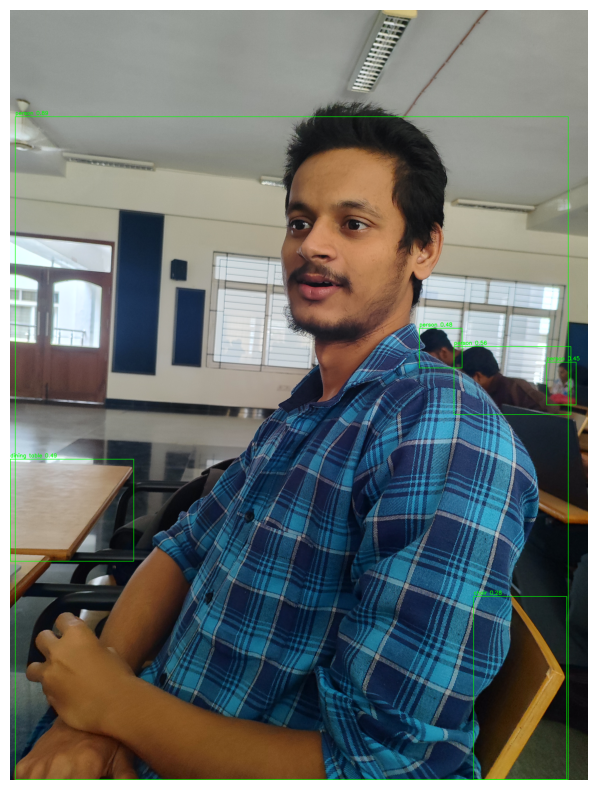

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()